# Empirical Analysis

## Importation

In [75]:
import random
import time
import tabulate
import numpy as np
import alive_progress as ap
import seaborn as sns
import matplotlib.pyplot as plt
from dictionary.word_frequency import WordFrequency
from dictionary.list_dictionary import ListDictionary
from dictionary.hashtable_dictionary import HashTableDictionary
from dictionary.ternarysearchtree_dictionary import TernarySearchTreeDictionary

In [76]:
def read_file():
    # Read in sampleData200k.txt
    ret_dict = {}
    with open('sampleData200k.txt', 'r') as f:
        sample_data = [line.strip() for line in f.readlines()]
        sample_data = [WordFrequency(word=line.split()[0], frequency=int(line.split()[1])) for line in sample_data]

        for i in range(16):
            prev_size = 200000 // 2 ** (16 - (i - 1))
            size = 200000 // 2 ** (16 - i)
            ret_dict[size + prev_size] = sample_data[:size + prev_size]
    return ret_dict

In [77]:
dictionaries = read_file()

## Use Case Scenarios

1. **Growing dictionary**: The dictionary is growing in size, and you are to evaluate and compare the running times of the Add operations across different data structures.

2. **Shrinking dictionary**: The dictionary is shrinking in size, and you are to evaluate and compare the running times of the Delete operations across different data structures.

1. **Static dictionary**: You are to evaluate and compare the running times of the Search and Auto-completion operations on fixed size dictionaries.

### Growing Dictionary

Dictionaries will be built of various sizes over the three data structures. The average computational time will be recorded to be analysed later.

In [78]:
# noinspection PyPep8Naming
def growing_analysis(dicts: dict, NO_RUNS: int = 10):
    # Build dictionaries.
    # noinspection PyShadowingNames
    dict_sizes, list_times, hash_times, tst_times = list(), list(), list(), list()
    list_dictionary, hash_dict, tst_dict = ListDictionary(), HashTableDictionary(), TernarySearchTreeDictionary()
    # Calculate time taken to build dictionaries.
    for run_no in range(NO_RUNS):
        with ap.alive_bar(len(dicts.keys())) as bar:
            for index, size in enumerate(dicts.keys()):
                start_time = time.perf_counter_ns()
                list_dictionary.build_dictionary(dicts[size])
                list_times.append(list()) if run_no == 0 else None
                list_times[index].append(time.perf_counter_ns() - start_time)

                start_time = time.perf_counter_ns()
                hash_dict.build_dictionary(dicts[size])
                hash_times.append(list()) if run_no == 0 else None
                hash_times[index].append(time.perf_counter_ns() - start_time)

                start_time = time.perf_counter_ns()
                tst_dict.build_dictionary(dicts[size])
                tst_times.append(list()) if run_no == 0 else None
                tst_times[index].append(time.perf_counter_ns() - start_time)

                dict_sizes.append(size) if run_no == 0 else None
                bar()
    return dict_sizes, list_times, hash_times, tst_times

In [79]:
dict_sizes_add, list_times_add, hash_times_add, tst_times_add = growing_analysis(dictionaries, NO_RUNS=10)

|████████████████████████████████████████| 16/16 [100%] in 6.9s (2.30/s) 
|████████████████████████████████████████| 16/16 [100%] in 3.4s (4.71/s) 
|████████████████████████████████████████| 16/16 [100%] in 3.2s (5.08/s) 
|████████████████████████████████████████| 16/16 [100%] in 3.5s (4.59/s) 
|████████████████████████████████████████| 16/16 [100%] in 3.6s (4.42/s) 
|████████████████████████████████████████| 16/16 [100%] in 3.3s (4.92/s) 
|████████████████████████████████████████| 16/16 [100%] in 3.1s (5.19/s) 
|████████████████████████████████████████| 16/16 [100%] in 3.3s (4.87/s) 
|████████████████████████████████████████| 16/16 [100%] in 3.4s (4.68/s) 
|████████████████████████████████████████| 16/16 [100%] in 3.2s (5.01/s) 


In [80]:
def find_average(l: list):
    return [sum(times) / len(times) for times in l]

In [81]:
list_avg_add = find_average(list_times_add)
hash_avg_add = find_average(hash_times_add)
tst_avg_add = find_average(tst_times_add)

In [82]:
# noinspection PyShadowingNames
def print_table(dict_sizes: list, list_avg: list, hash_avg: list, tst_avg: list):
    print(tabulate.tabulate(np.c_[dict_sizes, list_avg, hash_avg, tst_avg],
                            headers=['Dictionary Size', 'List', 'Hash Table', 'TST'], tablefmt='fancy_grid'))

#### Average Building Computational Time

##### Table

In [83]:
print_table(dict_sizes_add, list_avg_add, hash_avg_add, tst_avg_add)

╒═══════════════════╤══════════════════╤══════════════════╤══════════════════╕
│   Dictionary Size │             List │       Hash Table │              TST │
╞═══════════════════╪══════════════════╪══════════════════╪══════════════════╡
│                 4 │   6630           │   9350           │  45380           │
├───────────────────┼──────────────────┼──────────────────┼──────────────────┤
│                 9 │   3440           │   6550           │  63500           │
├───────────────────┼──────────────────┼──────────────────┼──────────────────┤
│                18 │   4960           │  11580           │ 168690           │
├───────────────────┼──────────────────┼──────────────────┼──────────────────┤
│                36 │   8980           │  22210           │ 277210           │
├───────────────────┼──────────────────┼──────────────────┼──────────────────┤
│                72 │  15710           │  40420           │ 553490           │
├───────────────────┼──────────────────┼────────────

##### Graph

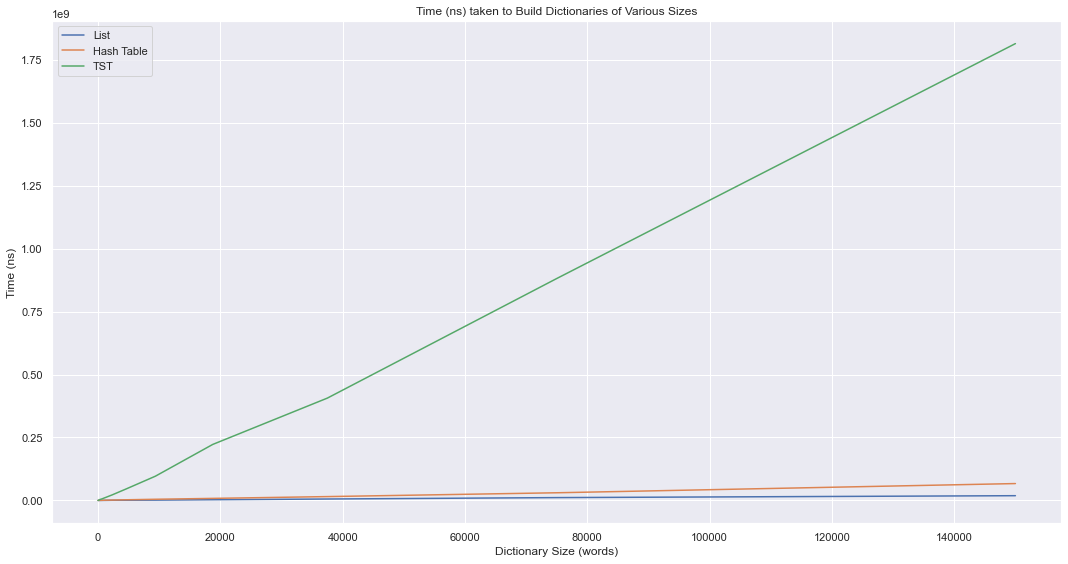

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid", rc={'figure.figsize':(15,8)})
plt.plot(dict_sizes_add, list_avg_add, label='List')
plt.plot(dict_sizes_add, hash_avg_add, label='Hash Table')
plt.plot(dict_sizes_add, tst_avg_add, label='TST')
plt.title('Time (ns) taken to Build Dictionaries of Various Sizes')
plt.xlabel('Dictionary Size (words)')
plt.ylabel('Time (ns)')
plt.legend()
# plt.yscale('log')
# plt.xscale('log')
plt.tight_layout()
plt.show()

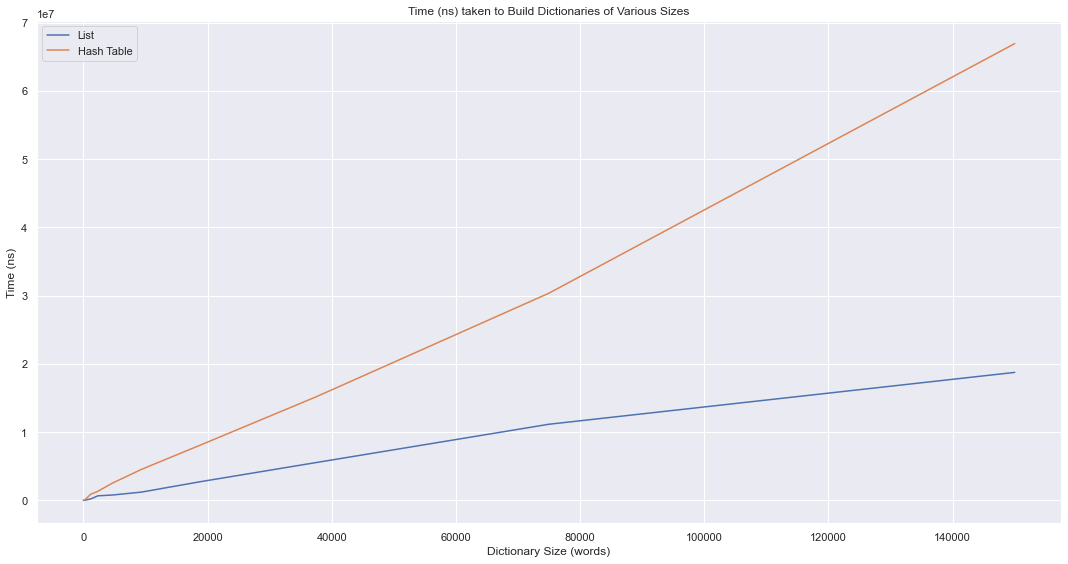

In [87]:
sns.set(style="darkgrid", rc={'figure.figsize':(15,8)})
plt.plot(dict_sizes_add, list_avg_add, label='List')
plt.plot(dict_sizes_add, hash_avg_add, label='Hash Table')
plt.title('Time (ns) taken to Build Dictionaries of Various Sizes')
plt.xlabel('Dictionary Size (words)')
plt.ylabel('Time (ns)')
# plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

### Shrinking Dictionary

A large dictionary will be shrunk to various sizes over the three data structures. The average computational time will be recorded to be analysed later.

In [148]:
import random
import math

# noinspection PyPep8Naming
def shrinking_analysis(dicts: dict, del_percent: float = 0.3):
    # Build dictionaries.
    # noinspection PyShadowingNames
    dict_sizes, list_times, hash_times, tst_times = list(), list(), list(), list()
    list_dict, hash_dict, tst_dict = ListDictionary(), HashTableDictionary(), TernarySearchTreeDictionary()

    # Calculate time taken to build dictionaries.
    for i, size in enumerate(dicts.keys()):
        list_dict.build_dictionary(dicts[size])
        hash_dict.build_dictionary(dicts[size])
        tst_dict.build_dictionary(dicts[size])

        del_list = [random.choice(dicts[size]) for _ in range(math.ceil(size * del_percent))]
        # print(f'{size}: {len(del_list)}')
        # del_word = random.choice(dicts[size]).word
        list_times.append(list())
        hash_times.append(list())
        tst_times.append(list())
        
        for del_wf in del_list:
            start_time = time.perf_counter_ns()
            list_dict.delete_word(del_wf.word)#del_word for del_word in del_list)
            list_times[i].append((time.perf_counter_ns() - start_time))# / len(del_list))

            start_time = time.perf_counter_ns()
            hash_dict.delete_word(del_wf.word)# for del_word in del_list)
            hash_times[i].append((time.perf_counter_ns() - start_time))# / len(del_list))

            start_time = time.perf_counter_ns()
            tst_dict.delete_word(del_wf.word)# for del_word in del_list)
            tst_times[i].append((time.perf_counter_ns() - start_time))# / len(del_list))

            list_dict.add_word_frequency(del_wf)
            hash_dict.add_word_frequency(del_wf)
            tst_dict.add_word_frequency(del_wf)

        dict_sizes.append(size)
    return dict_sizes, list_times, hash_times, tst_times

In [ ]:
dict_sizes_del1, list_times_del1, hash_times_del1, tst_times_del1 = shrinking_analysis(dicts=dictionaries, del_percent=0.3)

In [ ]:
list_avg_del1 = find_average(list_times_del1)
hash_avg_del1 = find_average(hash_times_del1)
tst_avg_del1 = find_average(tst_times_del1)

In [144]:
print_table(dict_sizes_del1, list_avg_del1, hash_avg_del1, tst_avg_del1)

╒═══════════════════╤══════════════════╤══════════════╤════════╕
│   Dictionary Size │             List │   Hash Table │    TST │
╞═══════════════════╪══════════════════╪══════════════╪════════╡
│                 4 │   6000           │         3000 │  39200 │
├───────────────────┼──────────────────┼──────────────┼────────┤
│                 9 │   5200           │         4400 │  21500 │
├───────────────────┼──────────────────┼──────────────┼────────┤
│                18 │  14200           │         1800 │  16500 │
├───────────────────┼──────────────────┼──────────────┼────────┤
│                36 │  26800           │         4600 │  38400 │
├───────────────────┼──────────────────┼──────────────┼────────┤
│                72 │  18600           │         3600 │  39600 │
├───────────────────┼──────────────────┼──────────────┼────────┤
│               145 │  27200           │         4700 │  71800 │
├───────────────────┼──────────────────┼──────────────┼────────┤
│               292 │ 192

C:\Users\Raf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Raf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Raf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


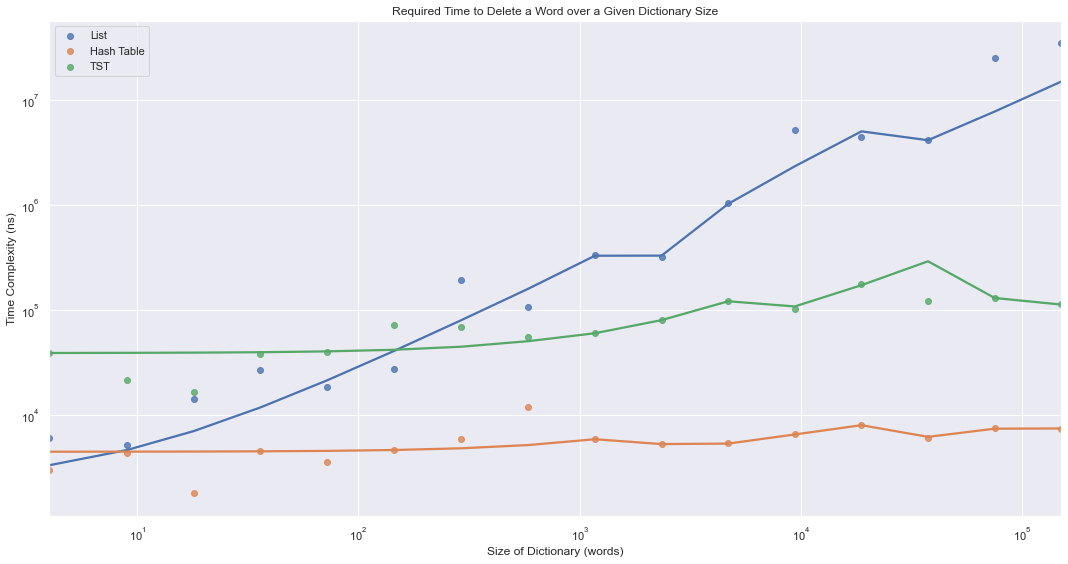

In [145]:
sns.set(style="darkgrid", rc={'figure.figsize':(15,8)})
sns.regplot(dict_sizes_del1, list_avg_del1, label='List', lowess=True)
sns.regplot(dict_sizes_del1, hash_avg_del1, label='Hash Table', lowess=True)
sns.regplot(dict_sizes_del1, tst_avg_del1, label='TST', lowess=True)

plt.title('Required Time to Delete a Word over a Given Dictionary Size')
plt.xlabel('Size of Dictionary (words)')
plt.ylabel('Time Complexity (ns)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.show()